<a href="https://colab.research.google.com/github/JanakiRaman-2002/tensorflow/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks

##Imports


In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

##Data

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0, 23, 23]

194

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

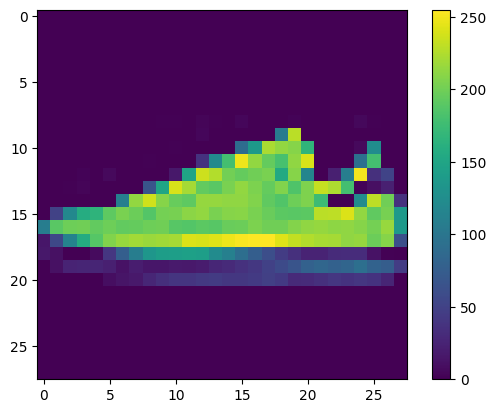

In [10]:
plt.figure()
plt.imshow(train_images[6])
plt.colorbar()
plt.grid(False)
plt.show()

##Data Preprocessing

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

##Building the model

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax') #10 classes
])

##Compiling the model

In [18]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

##Training

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4963 - accuracy: 0.8277
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3726 - accuracy: 0.8657
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3303 - accuracy: 0.8803
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3112 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2908 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2784 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2657 - accuracy: 0.9010
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2564 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2459 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2

##Evaluating the model

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3393 - accuracy: 0.8811
Test accuracy: 0.8810999989509583


##Making Preds

In [21]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [22]:
predictions[0]

array([1.3711085e-06, 4.2276552e-10, 1.1154174e-07, 2.4824854e-11,
       2.5166688e-07, 2.1115090e-03, 1.3107924e-08, 4.2309738e-03,
       2.8146227e-08, 9.9365568e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

##Verification

Pick a number: 45
1/1 [==============================] - 0s 21ms/step


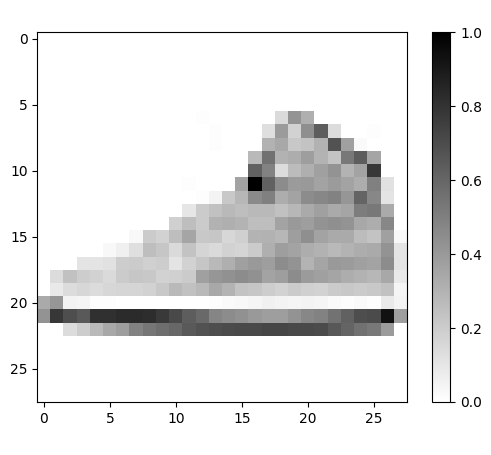

In [26]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
